In [1]:
import os;os.environ['LAMBDA_PARQUET_TICK_DB']=rf'X:\lambda_data'

In [2]:
from notebooks.lambda_imports import *
import os
import seaborn as sns
sns.set_theme()
plt.style.use('seaborn')

import json
import time
import pylab
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 15)

PROJECT_PATH=E:\javif\Coding\Python\market_making_fw\python_lambda
BACKTEST_OUTPUT_PATH(LAMBDA_OUTPUT_PATH)=X:\lambda_data\output_models
BACKTEST_TEMP_PATH(LAMBDA_TEMP_PATH)=E:\javif\Coding\Python\market_making_fw\java\temp;
BACKTEST_JAR_PATH(LAMBDA_JAR_PATH)=E:\javif\Coding\Python\market_making_fw\java\executables\Backtest\target\Backtest.jar
log_path(LAMBDA_LOGS_PATH)=E:\javif\Coding\Python\market_making_fw\python_lambda\logs
PARQUET_PATH_DB(LAMBDA_PARQUET_TICK_DB)=X:\lambda_data
Populating the interactive namespace from numpy and matplotlib


E:\Anaconda3\envs\lambda\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['copy', 'pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
MEMORY_REPLAY_PATH=rf'{BACKTEST_OUTPUT_PATH}\memoryReplay_AvellanedaDQN_avellaneda_stoikov_dqn_1.csv'
MEMORY_REPLAY_PATH_RNN=rf'{BACKTEST_OUTPUT_PATH}\memoryReplay_AvellanedaDQN_avellaneda_stoikov_rnn_dqn_0.csv'

In [4]:
from backtest.avellaneda_dqn import AvellanedaDQN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from backtest.input_configuration import JAR_PATH, TrainInputConfiguration
avellaneda_dqn = AvellanedaDQN(algorithm_info='avellaneda_stoikov_dqn')

# HyperParameter tuning

In [ ]:
train_input_configuration = TrainInputConfiguration(memory_path=rf"{MEMORY_REPLAY_PATH}",
                                                    output_model_path=rf"{BACKTEST_OUTPUT_PATH}\hyperparameter_output.model",
                                                    state_columns=32,
                                                    action_columns=20,
                                                    number_epochs=150,
                                                    learning_rate=0.01,
                                                    l1=0.0,
                                                    l2=0.0,
                                                    batch_size=500,
                                                    max_batch_size=5000,
                                                    momentum_nesterov=0.5,
                                                    is_rnn=False,
                                                    hyperparameter_tuning=True
                                                    )


avellaneda_dqn.train_model(jar_path=JAR_PATH, train_input_configuration=train_input_configuration)

launching 
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks


In [ ]:
train_input_configuration = TrainInputConfiguration(memory_path=rf"{MEMORY_REPLAY_PATH_RNN}",
                                                    output_model_path=rf"{BACKTEST_OUTPUT_PATH}\hyperparameter_rnn_output.model",
                                                    state_columns=32,
                                                    action_columns=20,
                                                    number_epochs=150,
                                                    learning_rate=0.01,
                                                    l1=0.0,
                                                    l2=0.0,
                                                    batch_size=500,
                                                    max_batch_size=5000,
                                                    momentum_nesterov=0.5,
                                                    is_rnn=True,
                                                    hyperparameter_tuning=True
                                                    )


avellaneda_dqn.train_model(jar_path=JAR_PATH, train_input_configuration=train_input_configuration)

# Train

In [5]:
train_input_configuration = TrainInputConfiguration(memory_path=rf"{MEMORY_REPLAY_PATH}",
                                                    output_model_path=rf'{BACKTEST_OUTPUT_PATH}\predict_model_AvellanedaDQN_avellaneda_stoikov_dqn_EXTERN.model',
                                                    state_columns=32,
                                                    action_columns=20,
                                                    number_epochs=50,
                                                    learning_rate=0.01,
                                                    l1=0.0,
                                                    l2=0.0,
                                                    batch_size=500,
                                                    max_batch_size=5000,
                                                    momentum_nesterov=0.5,
                                                    is_rnn=False,
                                                    hyperparameter_tuning=False,
                                                    training_stats=0.0
                                                    )
avellaneda_dqn.train_model(jar_path=JAR_PATH, train_input_configuration=train_input_configuration)


launching 
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks
 finished with code 0
finished 1 training in 2 minutes


In [6]:
train_input_configuration = TrainInputConfiguration(memory_path=rf"{MEMORY_REPLAY_PATH_RNN}",
                                                    output_model_path=rf'{BACKTEST_OUTPUT_PATH}\predict_model_AvellanedaDQN_avellaneda_stoikov_rnn_dqn_EXTERN.model',
                                                    state_columns=32,
                                                    action_columns=20,
                                                    number_epochs=50,
                                                    learning_rate=0.01,
                                                    l1=0.0,
                                                    l2=0.0,
                                                    batch_size=500,
                                                    max_batch_size=5000,
                                                    momentum_nesterov=0.5,
                                                    is_rnn=True,
                                                    hyperparameter_tuning=False,
                                                    training_stats=0.0
                                                    )
avellaneda_dqn.train_model(jar_path=JAR_PATH, train_input_configuration=train_input_configuration)

launching 
pwd=E:\javif\Coding\Python\market_making_fw\python_lambda\notebooks
 finished with code 0
finished 1 training in 0 minutes


# Memory Replay observer

In [6]:
FIRST_HOUR=7.0
LAST_HOUR=19.0
QUANTITY=0.0001
most_significant_state_columns=[
 'ask_price_0',
 'ask_price_4',
 'ask_price_8',
 'ask_qty_0',
 'ask_qty_1',
 'ask_qty_2',
 'ask_qty_3',
 'bid_price_0',
 'bid_price_4',
 'bid_price_8',
 'bid_qty_0',
 'bid_qty_1',
 'bid_qty_2',
 'high_4',
 'last_close_price_4',
 'low_0',
 'microprice_0',
 'microprice_8',
 'midprice_8',
 'spread_0',
 'spread_4',
 'spread_8'
]
parameters = {
    # Q
    'skewPricePctAction': [0.0, 0.05, -0.05, -0.1, 0.1],
     'riskAversionAction': [0.01, 0.1, 0.2, 0.9],
     'windowsTickAction': [24.69016704781259],
    
    "minPrivateState": (-1),
    "maxPrivateState": (1),
    "numberDecimalsPrivateState":(3),
    "horizonTicksPrivateState": (5),
    
    "minMarketState": (-1),
    "maxMarketState": (1),
    "numberDecimalsMarketState": (7),
    "horizonTicksMarketState": (10),
    
    "minCandleState": (-1),
    "maxCandleState": (1),
    "numberDecimalsCandleState": (3),
    "horizonCandlesState": (2),
    
    "horizonMinMsTick": (0),    
    "scoreEnum": ScoreEnum.asymmetric_dampened_pnl,
    "timeHorizonSeconds": (5),
    "epsilon": (0.2),  # probability of explore=> random action
    "discountFactor": 0.95,  # next state prediction reward discount
    "learningRate": 0.95,  # 0.25 in phd? new values reward multiplier
    "momentumNesterov": 0.5,#momentum nesterov nn
    "learningRateNN": 0.01,#on nn
    # Avellaneda default
    "risk_aversion": (0.9),
    "position_multiplier": (100),
    "window_tick": (10),
    "minutes_change_k": (10),
    "quantity": (QUANTITY),
    "k_default": (0.00769),
    "spread_multiplier": (5.0),
    "first_hour": (FIRST_HOUR),
    "last_hour": (LAST_HOUR),
    #DQN
    "maxBatchSize": 10000,
    "batchSize": 5000,
    "trainingPredictIterationPeriod": -1,  # train only at the end,offline
    "trainingTargetIterationPeriod": -1,  # train at the end,offline
    "epoch": 300,
    "stateColumnsFilter": most_significant_state_columns,
    "l1":0.,
    "l2":0.,
    
}
algorithm_name="alpha_avellaneda"

In [7]:
alpha_avellaneda_dqn=AvellanedaDQN(algorithm_info=algorithm_name,parameters=parameters)
memory_replay_df=alpha_avellaneda_dqn.get_memory_replay_df(memory_replay_file=MEMORY_REPLAY_PATH)

In [15]:
memory_replay_rnn_df=alpha_avellaneda_dqn.get_memory_replay_df(memory_replay_file=MEMORY_REPLAY_PATH_RNN)

In [8]:
reward_columns =[]
for column in memory_replay_df.columns:
    if 'reward' in column:
        reward_columns.append(column)
rewards=memory_replay_df[reward_columns]
rewards

,action_0_reward,action_1_reward,action_2_reward,action_3_reward,action_4_reward,action_5_reward,action_6_reward,action_7_reward,action_8_reward,action_9_reward,action_10_reward,action_11_reward,action_12_reward,action_13_reward,action_14_reward,action_15_reward,action_16_reward,action_17_reward,action_18_reward,action_19_reward
0,0.048734,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,-0.000042,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.176633,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.020347,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.000000,0.0,0.706575,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.000000,0.0,-1.308698,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
rewards=rewards.replace(0.00,np.nan)
rewards

,action_0_reward,action_1_reward,action_2_reward,action_3_reward,action_4_reward,action_5_reward,action_6_reward,action_7_reward,action_8_reward,action_9_reward,action_10_reward,action_11_reward,action_12_reward,action_13_reward,action_14_reward,action_15_reward,action_16_reward,action_17_reward,action_18_reward,action_19_reward
0,0.048734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,-0.000042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-0.176633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.020347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99996,NaN,NaN,0.706575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99997,NaN,NaN,-1.308698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
rewards.describe()

,action_0_reward,action_1_reward,action_2_reward,action_3_reward,action_4_reward,action_5_reward,action_6_reward,action_7_reward,action_8_reward,action_9_reward,action_10_reward,action_11_reward,action_12_reward,action_13_reward,action_14_reward,action_15_reward,action_16_reward,action_17_reward,action_18_reward,action_19_reward
count,1844.000000,1413.000000,9.378000e+03,1778.000000,1691.000000,2016.000000,3269.000000,2885.000000,2376.000000,3616.000000,2039.000000,1429.000000,2774.000000,3108.000000,3521.000000,2231.000000,3491.000000,2349.000000,2340.000000,2978.000000
mean,-0.482226,-0.335486,1.473364e-02,0.227558,-1.332775,0.191871,0.247979,-0.044283,-0.606085,0.167105,-0.463022,0.003981,-0.088031,4.479894,-0.197067,-0.243047,1.257678,-0.008863,0.052058,0.041212
std,43.691450,15.094518,1.140592e+01,15.096650,29.419583,40.954314,31.914278,7.079879,20.331802,8.175844,26.563960,8.790817,11.778613,258.064536,13.051384,8.283386,66.216565,6.338042,30.211502,5.497747
min,-1032.457456,-494.810275,-3.868189e+02,-464.705804,-695.573057,-520.292140,-121.209043,-172.664908,-583.917621,-135.837095,-478.303573,-140.355232,-522.069747,-96.817357,-570.490139,-151.662156,-998.902940,-111.831408,-630.022396,-168.146787
25%,-0.235904,-0.085595,-4.010533e-01,-0.177300,-0.350334,-0.035117,-0.163521,-0.077481,-0.136135,-0.340771,-0.046834,-0.089460,-0.183908,-0.191974,-0.058869,-0.156409,-0.325145,-0.025912,-0.107751,-0.078222
50%,-0.000380,0.000450,-6.682500e-07,0.000008,-0.000334,0.000232,-0.000012,-0.000240,0.000057,0.000060,0.000002,-0.000475,-0.000640,-0.000192,0.000029,-0.000161,-0.000120,-0.000474,0.000052,-0.000027
75%,0.265540,0.168155,3.835632e-01,0.284878,0.261923,0.081197,0.151084,0.086230,0.263185,0.338503,0.075273,0.090809,0.058717,0.193752,0.058150,0.184341,0.332585,0.007254,0.213035,0.100267
max,973.340472,119.948326,6.414717e+02,167.589110,169.536053,1597.911601,1760.864293,150.589330,119.530544,129.324200,782.276306,167.638381,124.050191,14382.102758,252.828991,99.752092,1915.011504,219.300421,1254.837179,87.256628


In [31]:
rewards.T.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,99975,99976,99977,99978,99979,99980,99981,99982,99983,99984,99985,99986,99987,99988,99989,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
count,1.000000,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,0.0,1.00000,1.00000,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,1.000000,0.0,0.0,1.000000,1.000000,1.000000,...,1.000000,0.0,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000,0.0,1.000000,1.00000,0.0,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000
mean,0.000024,NaN,NaN,NaN,NaN,NaN,-0.340641,1.388061,NaN,NaN,0.29591,-0.09854,NaN,NaN,NaN,0.000644,NaN,NaN,NaN,-0.576396,NaN,NaN,0.210778,-0.082575,7.011941,...,-2.259614,NaN,-0.325762,-0.001484,0.31574,0.233389,-0.741375,7.16652,0.197125,0.046258,NaN,-0.143551,0.03029,NaN,NaN,-0.502804,NaN,0.433481,0.010245,-47.497338,-3.628365,-1.377197,NaN,1.636829,0.067035
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000024,NaN,NaN,NaN,NaN,NaN,-0.340641,1.388061,NaN,NaN,0.29591,-0.09854,NaN,NaN,NaN,0.000644,NaN,NaN,NaN,-0.576396,NaN,NaN,0.210778,-0.082575,7.011941,...,-2.259614,NaN,-0.325762,-0.001484,0.31574,0.233389,-0.741375,7.16652,0.197125,0.046258,NaN,-0.143551,0.03029,NaN,NaN,-0.502804,NaN,0.433481,0.010245,-47.497338,-3.628365,-1.377197,NaN,1.636829,0.067035
25%,0.000024,NaN,NaN,NaN,NaN,NaN,-0.340641,1.388061,NaN,NaN,0.29591,-0.09854,NaN,NaN,NaN,0.000644,NaN,NaN,NaN,-0.576396,NaN,NaN,0.210778,-0.082575,7.011941,...,-2.259614,NaN,-0.325762,-0.001484,0.31574,0.233389,-0.741375,7.16652,0.197125,0.046258,NaN,-0.143551,0.03029,NaN,NaN,-0.502804,NaN,0.433481,0.010245,-47.497338,-3.628365,-1.377197,NaN,1.636829,0.067035
50%,0.000024,NaN,NaN,NaN,NaN,NaN,-0.340641,1.388061,NaN,NaN,0.29591,-0.09854,NaN,NaN,NaN,0.000644,NaN,NaN,NaN,-0.576396,NaN,NaN,0.210778,-0.082575,7.011941,...,-2.259614,NaN,-0.325762,-0.001484,0.31574,0.233389,-0.741375,7.16652,0.197125,0.046258,NaN,-0.143551,0.03029,NaN,NaN,-0.502804,NaN,0.433481,0.010245,-47.497338,-3.628365,-1.377197,NaN,1.636829,0.067035
75%,0.000024,NaN,NaN,NaN,NaN,NaN,-0.340641,1.388061,NaN,NaN,0.29591,-0.09854,NaN,NaN,NaN,0.000644,NaN,NaN,NaN,-0.576396,NaN,NaN,0.210778,-0.082575,7.011941,...,-2.259614,NaN,-0.325762,-0.001484,0.31574,0.233389,-0.741375,7.16652,0.197125,0.046258,NaN,-0.143551,0.03029,NaN,NaN,-0.502804,NaN,0.433481,0.010245,-47.497338,-3.628365,-1.377197,NaN,1.636829,0.067035
max,0.000024,NaN,NaN,NaN,NaN,NaN,-0.340641,1.388061,NaN,NaN,0.29591,-0.09854,NaN,NaN,NaN,0.000644,NaN,NaN,NaN,-0.576396,NaN,NaN,0.210778,-0.082575,7.011941,...,-2.259614,NaN,-0.325762,-0.001484,0.31574,0.233389,-0.741375,7.16652,0.197125,0.046258,NaN,-0.143551,0.03029,NaN,NaN,-0.502804,NaN,0.433481,0.010245,-47.497338,-3.628365,-1.377197,NaN,1.636829,0.067035


In [32]:
rewards.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,99975,99976,99977,99978,99979,99980,99981,99982,99983,99984,99985,99986,99987,99988,99989,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
action_0_reward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
action_1_reward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.09854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
action_2_reward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.16652,NaN,0.046258,NaN,NaN,0.03029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.628365,NaN,NaN,NaN,NaN
action_3_reward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.210778,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.143551,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
action_4_reward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
action_5_reward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.502804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
action_6_reward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.011941,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
action_7_reward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.197125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
action_8_reward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.29591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.433481,NaN,NaN,NaN,-1.377197,NaN,NaN,NaN
action_9_reward,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.388061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.576396,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
rewards.T.describe().T["mean"].hist()

KeyboardInterrupt: 

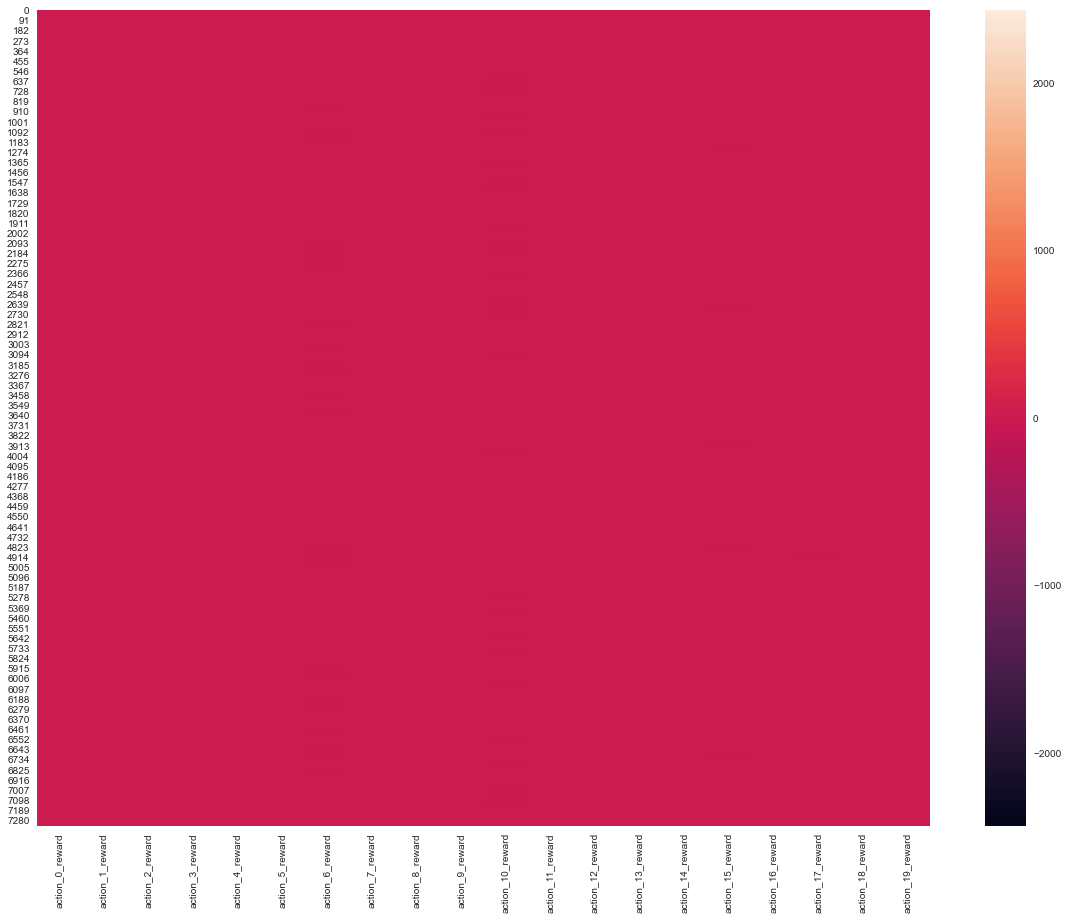

In [28]:
ax = sns.heatmap(rewards)

In [ ]:
states=

In [26]:
# market_df = memory_replay_df.filter(regex='^market',axis=1)
# market_df.describe()